<a href="https://colab.research.google.com/github/guilhermelaviola/FantasySoccer/blob/main/ScandinaviaNTStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-dateutil

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import date

# **Collecting the data**

This data has been collected from the national football team Wikipedia pages of the countries that were once part of sn.

In [3]:
# Importing the dataset:
former_countries = pd.ExcelFile('former-countries.xlsx')
sn = pd.read_excel(former_countries, 'scandinavia-raw')

# Displaying the last 5 row:
sn.tail()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Nationality
263,NaN,FW,Joakim Persson,3 April 2002 (age 22),1,0,Sweden IK Sirius,Sweden
264,NaN,FW,Oscar Pettersson,1 February 2000 (age 24),1,0,Sweden IFK Göteborg,Sweden
265,NaN,FW,Roony Bardghji,15 November 2005 (age 19),0,0,Denmark Copenhagen,Sweden
266,NaN,FW,Oskar Fallenius,1 November 2001 (age 23),0,0,Sweden Djurgårdens IF,Sweden
267,NaN,FW,Momodou Sonko,31 January 2005 (age 19),0,0,Belgium Gent,Sweden


In [4]:
# Displaying the number of rows and columns in the dataset:
sn.shape

(268, 8)

In [5]:
# Displaying the datatypes presented in the columns:
sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Number         138 non-null    float64
 1   Position       268 non-null    object 
 2   Player         268 non-null    object 
 3   Date of birth  268 non-null    object 
 4   Matches        268 non-null    int64  
 5   Goals          268 non-null    int64  
 6   Club           268 non-null    object 
 7   Nationality    267 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 16.9+ KB


In [6]:
# Displaying general statistical information of the number data present in the dataset:
sn.describe()

,Number,Matches,Goals
count,138.000000,268.000000,268.000000
mean,11.963768,21.026119,2.179104
std,6.643596,27.032289,5.598088
min,1.000000,0.000000,0.000000
25%,6.000000,2.000000,0.000000
50%,12.000000,10.000000,0.000000
75%,18.000000,30.000000,2.000000
max,23.000000,140.000000,43.000000


# **Cleaning and transforming the data**

Columns to work on the data cleaning/transformation:
*   Position: Convert from the abbreviation to the actual position (e.g: GK to Goalkeeper).
*   Captain?: Based on the data in the 'Player' column, this column has got to have values such as 'captain', 'vice-captain', 'third-captain' or 'No'.

*   Player: Clean additional data, by removing words such as 'RET', 'INJ' or '(captain)'. Only the player name shall be displayed in this column.
*   Date of birth: Remove the ' (age xx)' after the actual date of birth, so this date can be converted to a datetime object.
*   Club: The club country name shown before the  club name shall be removed.

In [7]:
# Replacing abbreviations in the 'Position' column:
position_mapping = {
    'GK': '1. Goalkeeper',
    'DF': '2. Defender',
    'MF': '3. Midfielder',
    'FW': '4. Striker'
}

sn['Position'] = sn['Position'].replace(position_mapping)

# Creating the 'Captain?' column based on the 'Player' column:
def determine_captain_status(player):
    if '(captain)' in player:
        return 'First'
    elif '(vice-captain)' in player:
        return 'Second'
    elif '(third-captain)' in player:
        return 'Third'
    elif '(fourth-captain)' in player:
        return 'Fourth'
    else:
        return 'No'

sn['Captain?'] = sn['Player'].apply(determine_captain_status)

# Removing annotations from the 'Player' column:
sn['Player'] = sn['Player'].str.replace(r'\s*\(Captain\)|\s*\(captain\)|\s*\(vice-captain\)|\s*\(third-captain\)|\s*\(fourth-captain\)', '', regex=True).str.strip()

# Removing rows with 'RET' in the 'Player' column:
sn = sn[~sn['Player'].str.contains(r'\bRET\b', na=False)]

# Cleaning the 'Player' column:
sn['Player'] = sn['Player'].str.replace(r'\s*(INJ|\(captain\)|\(vice-captain\)|\(third-captain\))', '', regex=True).str.strip()

# Cleaning the 'Date of birth' column:
sn['Date of birth'] = sn['Date of birth'].str.replace(r'\s*\(age\s*\d+\)', '', regex=True)

# Spliting 'Club' column into 'Club country' and 'Club' columns:
sn[['Club country', 'Club']] = sn['Club'].str.split(' ', n=1, expand=True)
# Pass 'expand=True' as a keyword argument, and 'n=1' for the max splits

# Rearranging the columns:
sn = sn[['Number', 'Position', 'Player', 'Date of birth', 'Matches', 'Goals', 'Club', 'Club country', 'Captain?', 'Nationality']]

# Converting the 'Date of birth' to datetime object:
#pd.to_datetime(sn['Date of birth'])
sn['Date of birth'] = sn['Date of birth'].astype('datetime64[ns]')

# Displaying the last 5 row:
sn.tail()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality
263,NaN,4. Striker,Joakim Persson,2002-04-03,1,0,IK Sirius,Sweden,No,Sweden
264,NaN,4. Striker,Oscar Pettersson,2000-02-01,1,0,IFK Göteborg,Sweden,No,Sweden
265,NaN,4. Striker,Roony Bardghji,2005-11-15,0,0,Copenhagen,Denmark,No,Sweden
266,NaN,4. Striker,Oskar Fallenius,2001-11-01,0,0,Djurgårdens IF,Sweden,No,Sweden
267,NaN,4. Striker,Momodou Sonko,2005-01-31,0,0,Gent,Belgium,No,Sweden


In [8]:
# Exporting the cleaned dataset to a new Excel file:
sn.to_excel('data_cleaned.xlsx')

# **Displaying the data**

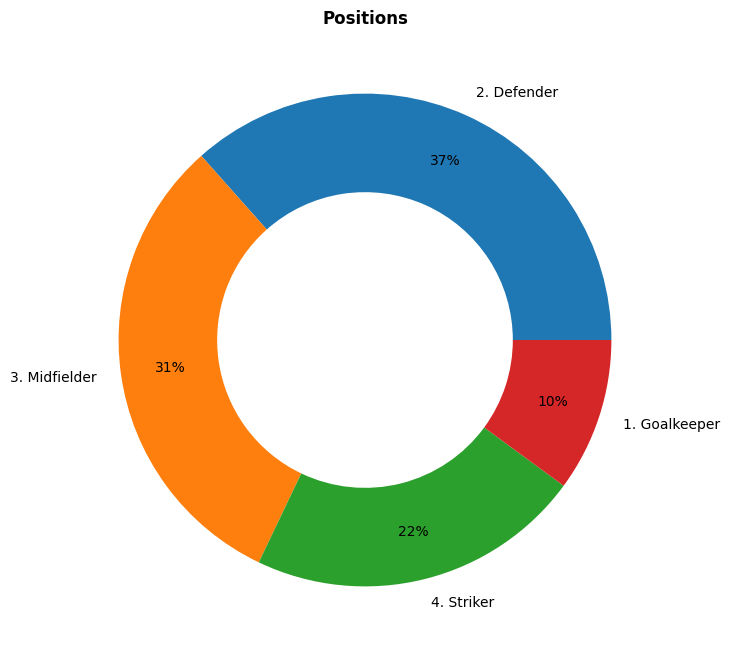

In [9]:
# Displaying the player's positions:
sn['Position'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Positions', fontweight = 'bold')
plt.show()

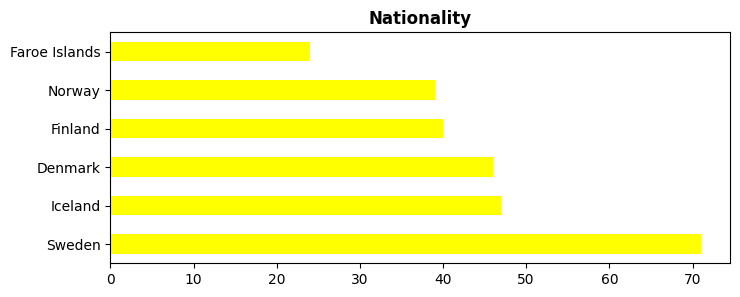

In [24]:
# Displaying the player's nationalities:
sn['Nationality'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 3))
plt.ylabel(None)
plt.title('Nationality', fontweight = 'bold')
plt.show()

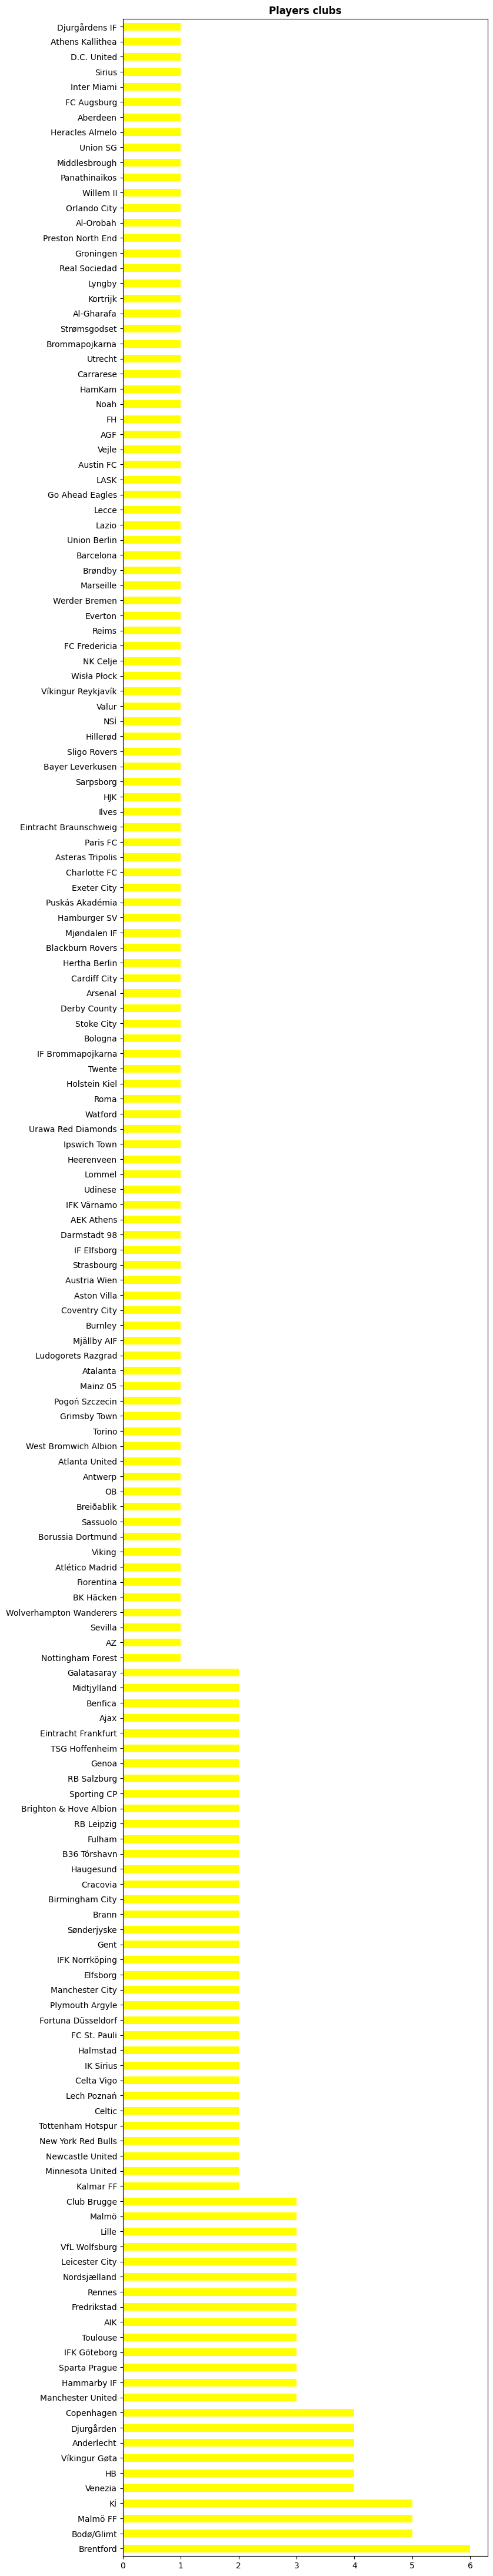

In [25]:
# Displaying the player's clubs:
sn['Club'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 56))
plt.ylabel(None)
plt.title('Players clubs', fontweight = 'bold')
plt.show()

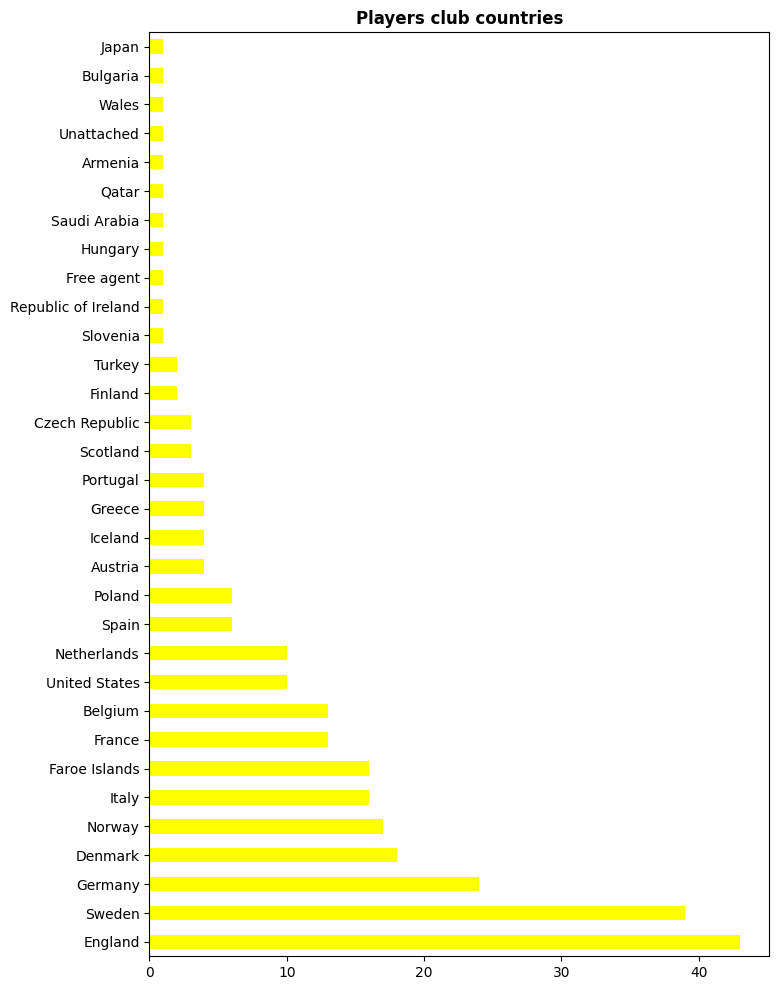

In [26]:
# Displaying the countries of the clubs the players defend:
sn['Club country'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 12))
plt.ylabel(None)
plt.title('Players club countries', fontweight = 'bold')
plt.show()

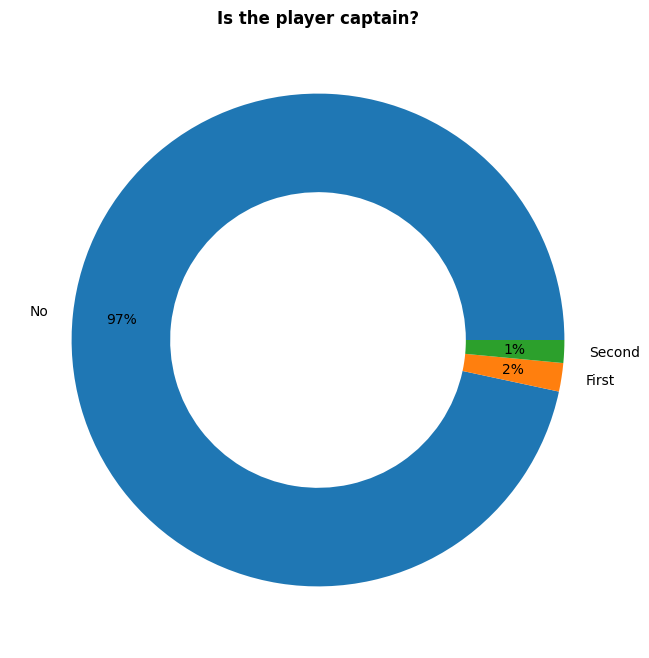

In [28]:
# Displaying if the player is captain of not:
sn['Captain?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Is the player captain?', fontweight = 'bold')
plt.show()

In [29]:
# Checking the match count level of the players:
def match_count_level(row):
  num_of_matches = row['Matches']
  if num_of_matches >= 25 and num_of_matches < 50:
    result = 'Over 25 matches played'
  elif num_of_matches >= 50 and num_of_matches < 100:
    result = 'Over 50 matches played'
  elif num_of_matches >= 100 and num_of_matches < 120:
    result = 'Over 100 matches played'
  elif num_of_matches >= 120:
    result = 'Over 120 matches played'
  else:
    result = 'Less than 20 matches played'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
sn['Match count level'] = sn.apply(match_count_level, axis=1)
sn.head()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality,Match count level,Goal count level,Age,Age group
0,1.0,1. Goalkeeper,Kasper Schmeichel,1986-11-05,111,0,Celtic,Scotland,No,Denmark,Over 100 matches played,Over 50 goals scored,38,36 or older
1,16.0,1. Goalkeeper,Mads Hermansen,2000-07-11,0,0,Leicester City,England,No,Denmark,Less than 20 matches played,Less than 5 goals scored,24,Between 20 and 25 years old
2,22.0,1. Goalkeeper,Peter Vindahl Jensen,1998-02-16,0,0,Sparta Prague,Czech Republic,No,Denmark,Less than 20 matches played,Less than 5 goals scored,26,Between 26 and 30 years old
3,2.0,2. Defender,Mads Bech Sørensen,1999-01-07,0,0,Midtjylland,Denmark,No,Denmark,Less than 20 matches played,Less than 5 goals scored,25,Between 20 and 25 years old
4,3.0,2. Defender,Jannik Vestergaard,1992-08-03,51,3,Leicester City,England,No,Denmark,Over 50 matches played,Over 50 goals scored,32,Between 31 and 35 years old


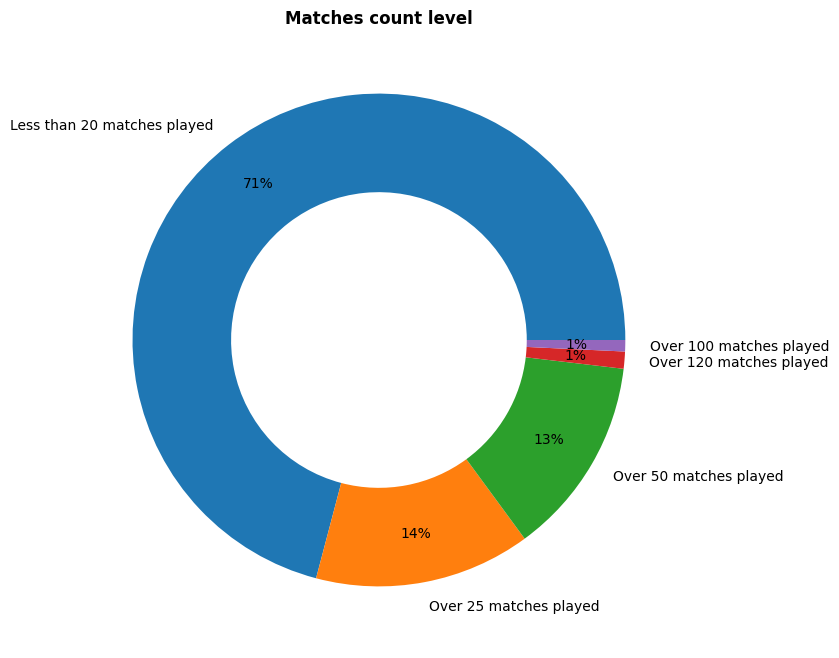

In [30]:
# Displaying the matches count result:
sn['Match count level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Matches count level', fontweight = 'bold')
plt.show()

In [32]:
# Checking the goals count level of the players:
def goal_count_level(row):
  num_of_goals = row['Matches']
  if num_of_goals >= 5 and num_of_goals < 10:
    result = 'Over 5 goals scored'
  elif num_of_goals >= 10 and num_of_goals < 20:
    result = 'Over 10 goals scored'
  elif num_of_goals >= 20 and num_of_goals < 40:
    result = 'Over 20 goals scored'
  elif num_of_goals >= 40 and num_of_goals < 50:
    result = 'Over 40 goals scored'
  elif num_of_goals >= 50:
    result = 'Over 50 goals scored'
  else:
    result = 'Less than 5 goals scored'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
sn['Goal count level'] = sn.apply(goal_count_level, axis=1)
sn.head()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality,Match count level,Goal count level,Age,Age group
0,1.0,1. Goalkeeper,Kasper Schmeichel,1986-11-05,111,0,Celtic,Scotland,No,Denmark,Over 100 matches played,Over 50 goals scored,38,36 or older
1,16.0,1. Goalkeeper,Mads Hermansen,2000-07-11,0,0,Leicester City,England,No,Denmark,Less than 20 matches played,Less than 5 goals scored,24,Between 20 and 25 years old
2,22.0,1. Goalkeeper,Peter Vindahl Jensen,1998-02-16,0,0,Sparta Prague,Czech Republic,No,Denmark,Less than 20 matches played,Less than 5 goals scored,26,Between 26 and 30 years old
3,2.0,2. Defender,Mads Bech Sørensen,1999-01-07,0,0,Midtjylland,Denmark,No,Denmark,Less than 20 matches played,Less than 5 goals scored,25,Between 20 and 25 years old
4,3.0,2. Defender,Jannik Vestergaard,1992-08-03,51,3,Leicester City,England,No,Denmark,Over 50 matches played,Over 50 goals scored,32,Between 31 and 35 years old


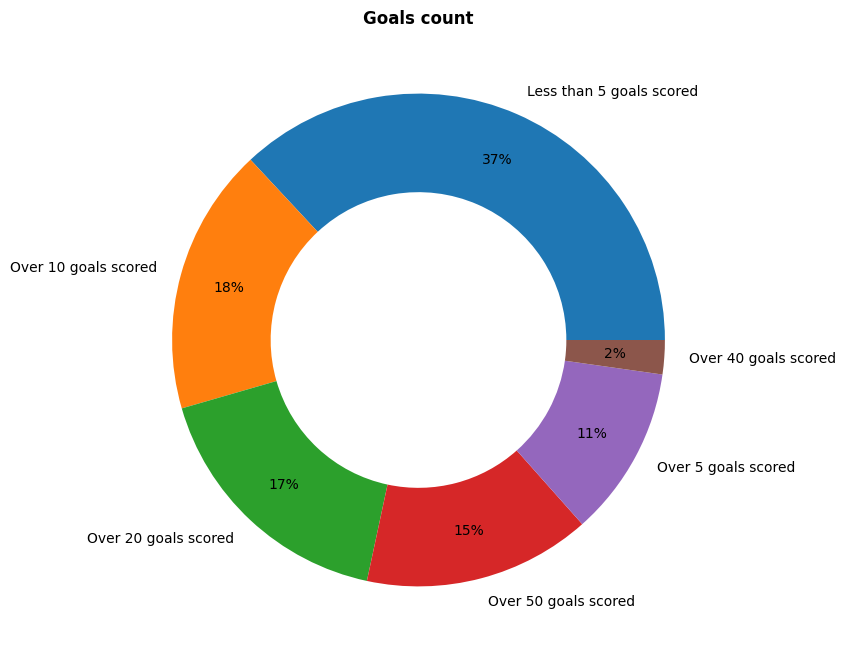

In [33]:
# Displaying the goals count result:
sn['Goal count level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Goals count', fontweight = 'bold')
plt.show()

In [34]:
now = date.today()
# Calculate player age and handle NaT values:
# Convert 'Date of birth' to datetime.date before passing to relativedelta
sn['Age'] = sn.apply(lambda x: relativedelta(now, x['Date of birth'].date()).years if pd.notna(x['Date of birth']) else pd.NaT, axis=1)
sn.tail()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality,Match count level,Goal count level,Age,Age group
263,NaN,4. Striker,Joakim Persson,2002-04-03,1,0,IK Sirius,Sweden,No,Sweden,Less than 20 matches played,Less than 5 goals scored,22,Between 20 and 25 years old
264,NaN,4. Striker,Oscar Pettersson,2000-02-01,1,0,IFK Göteborg,Sweden,No,Sweden,Less than 20 matches played,Less than 5 goals scored,24,Between 20 and 25 years old
265,NaN,4. Striker,Roony Bardghji,2005-11-15,0,0,Copenhagen,Denmark,No,Sweden,Less than 20 matches played,Less than 5 goals scored,19,Under 20 years old
266,NaN,4. Striker,Oskar Fallenius,2001-11-01,0,0,Djurgårdens IF,Sweden,No,Sweden,Less than 20 matches played,Less than 5 goals scored,23,Between 20 and 25 years old
267,NaN,4. Striker,Momodou Sonko,2005-01-31,0,0,Gent,Belgium,No,Sweden,Less than 20 matches played,Less than 5 goals scored,19,Under 20 years old


In [35]:
# Classifying the players by age group:
def age_group(row):
  age = row['Age']

  if age >= 20 and age <= 25:
    return 'Between 20 and 25 years old'
  elif age >= 26 and age <= 30:
    return 'Between 26 and 30 years old'
  elif age >= 31 and age <= 35:
    return 'Between 31 and 35 years old'
  elif age >= 36:
    return '36 or older'
  else:
    return 'Under 20 years old'

# Applying the function above on a column of the dataset and generating a new column as result:
sn['Age group'] = sn.apply(age_group, axis=1)
sn.tail()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality,Match count level,Goal count level,Age,Age group
263,NaN,4. Striker,Joakim Persson,2002-04-03,1,0,IK Sirius,Sweden,No,Sweden,Less than 20 matches played,Less than 5 goals scored,22,Between 20 and 25 years old
264,NaN,4. Striker,Oscar Pettersson,2000-02-01,1,0,IFK Göteborg,Sweden,No,Sweden,Less than 20 matches played,Less than 5 goals scored,24,Between 20 and 25 years old
265,NaN,4. Striker,Roony Bardghji,2005-11-15,0,0,Copenhagen,Denmark,No,Sweden,Less than 20 matches played,Less than 5 goals scored,19,Under 20 years old
266,NaN,4. Striker,Oskar Fallenius,2001-11-01,0,0,Djurgårdens IF,Sweden,No,Sweden,Less than 20 matches played,Less than 5 goals scored,23,Between 20 and 25 years old
267,NaN,4. Striker,Momodou Sonko,2005-01-31,0,0,Gent,Belgium,No,Sweden,Less than 20 matches played,Less than 5 goals scored,19,Under 20 years old


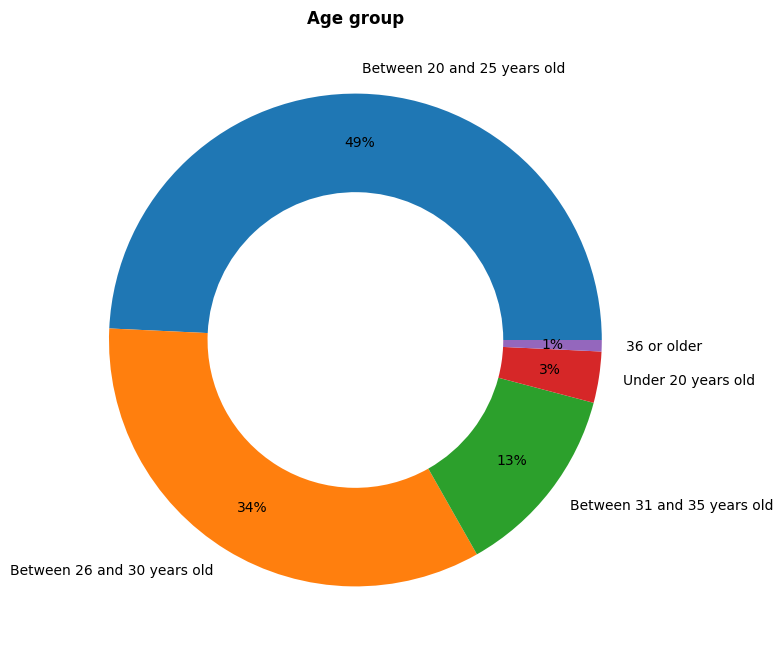

In [36]:
# Displaying the age groups:
sn['Age group'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Age group', fontweight = 'bold')
plt.show()